In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import requests
import pandas as pd

# API Key 및 URL 설정
key = "nU91IArDV1nZa26hpdkr93hasKwZtT77uqmGGR+EGkllr7N/ry9RGLF/BP0pj6C48yfDIGhTqmkk1+scSFTjPQ=="
base_url = "http://apis.data.go.kr/1471000/QdrgProdIprtPfmc/getQdrgProdIprtPfmc"

params = {
    'serviceKey': key,
    'type': 'json',
    'numOfRows': 100,  # 한 번에 가져올 데이터 수
    'pageNo': 1        # 시작 페이지
}

# 전체 데이터를 저장할 리스트
all_data = []

while True:
    # API 호출
    response = requests.get(base_url, params=params, verify=False)

    # 응답 상태 확인
    if response.status_code == 200:
        data = response.json()

        # JSON 구조 디버깅용 출력 (필요시 주석 해제)
        # print(data)

        # items 데이터 추출
        body = data.get("body", {})
        items = body.get("items", [])

        # items가 리스트인지 확인하고 추가
        if isinstance(items, list):
            all_data.extend(items)  # 리스트일 경우 데이터를 확장
        else:
            print("Unexpected items format:", type(items))
            break

        # Pagination 처리
        total_count = body.get("totalCount", 0)
        if params["pageNo"] * params["numOfRows"] >= total_count:
            break

        # 다음 페이지로 이동
        params["pageNo"] += 1
    else:
        print(f"Error {response.status_code}: {response.text}")
        break

# 데이터를 Pandas DataFrame으로 변환
df_sales = pd.DataFrame(all_data)

# CSV로 저장
csv_file_name = "supplements-sales.csv"
df_sales.to_csv(csv_file_name, index=False, encoding="utf-8-sig")
print(f"총 {len(all_data)}개의 데이터를 저장했습니다. CSV 파일 이름: {csv_file_name}")
csv_file_path = "/content/drive/MyDrive/supplements-sales.csv"
df_sales.to_csv(csv_file_path, index=False, encoding="utf-8-sig")
print(f"CSV 파일이 구글 드라이브에 저장되었습니다: {csv_file_path}")


print(df_sales.info())  # 데이터 타입 및 결측값 확인

In [ ]:
import requests
import pandas as pd

# API Key 및 URL 설정
key = "nU91IArDV1nZa26hpdkr93hasKwZtT77uqmGGR+EGkllr7N/ry9RGLF/BP0pj6C48yfDIGhTqmkk1+scSFTjPQ=="
base_url = "http://apis.data.go.kr/1471000/QdrgPrdtPrmsnInfoService03/getQdrgPrdtPrmsnInfoInq03"

params = {
    'serviceKey': key,
    'type': 'json',
    'numOfRows': 100,  # 한 번에 가져올 데이터 수
    'pageNo': 1        # 시작 페이지
}

# 전체 데이터를 저장할 리스트
all_data2 = []

while True:
    # API 호출
    response = requests.get(base_url, params=params, verify=False)

    # 응답 상태 확인
    if response.status_code == 200:
        data = response.json()

        # items 데이터 추출
        body = data.get("body", {})
        items = body.get("items", [])

        # items가 리스트인지 확인하고 추가
        if isinstance(items, list):
            all_data2.extend(items)  # 리스트일 경우 데이터를 확장
        else:
            print("Unexpected items format:", type(items))
            break

        # Pagination 처리
        total_count = body.get("totalCount", 0)
        if params["pageNo"] * params["numOfRows"] >= total_count:
            break

        # 다음 페이지로 이동
        params["pageNo"] += 1
    else:
        print(f"Error {response.status_code}: {response.text}")
        break

# 데이터를 Pandas DataFrame으로 변환
df_permit = pd.DataFrame(all_data2)

# CSV로 저장
csv_file_name = "supplements-permit.csv"
df_permit.to_csv(csv_file_name, index=False, encoding="utf-8-sig")
print(f"총 {len(all_data2)}개의 데이터를 저장했습니다. CSV 파일 이름: {csv_file_name}")
csv_file_path = "/content/drive/MyDrive/supplements-permit.csv"
df_permit.to_csv(csv_file_path, index=False, encoding="utf-8-sig")
print(f"CSV 파일이 구글 드라이브에 저장되었습니다: {csv_file_path}")

print(df_permit.info())  # 데이터 타입 및 결측값 확인

In [ ]:
import pandas as pd

df_permit = pd.read_csv("/content/drive/MyDrive/supplements-permit.csv")

# item 열을 개별 열로 확장
df_permit2 = pd.DataFrame(df_permit["item"].apply(eval).tolist())

# 결과 확인
print(df_permit2.head())
print(df_permit2.info())

# CSV로 저장
csv_file_name = "supplements-permit2.csv"
df_permit2.to_csv(csv_file_name, index=False, encoding="utf-8-sig")
print(f"총 {len(df_permit2)}개의 데이터를 저장했습니다. CSV 파일 이름: {csv_file_name}")
csv_file_path = "/content/drive/MyDrive/supplements-permit2.csv"
df_permit2.to_csv(csv_file_path, index=False, encoding="utf-8-sig")
print(f"CSV 파일이 구글 드라이브에 저장되었습니다: {csv_file_path}")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/supplements-permit.csv'

In [ ]:
df_permit = pd.read_csv("/content/drive/MyDrive/supplements-permit2.csv")
df_sales = pd.read_csv("/content/drive/MyDrive/supplements-sales.csv")

# 필요한 열만 선택하여 병합 준비
df_to_merge = df_permit[["ITEM_SEQ", "CLASS_NO", "CLASS_NO_NAME"]]

# ITEM_SEQ를 기준으로 병합 (left join)
df_merged = pd.merge(
    df_sales,                # 왼쪽 데이터프레임
    df_to_merge,             # 병합할 데이터프레임
    on="ITEM_SEQ",           # 병합 기준 열
    how="left"               # 왼쪽 조인 (df_sales 기준으로 병합)
)

# 결과 확인
print(df_merged.head())
print(df_merged.info())

# 결과를 CSV로 저장
csv_file_name = "supplements-merged.csv"
df_merged.to_csv(csv_file_name, index=False, encoding="utf-8-sig")
print(f"병합된 데이터가 CSV로 저장되었습니다: {csv_file_name}")

csv_file_path = "/content/drive/MyDrive/supplements-merged.csv"
df_merged.to_csv(csv_file_path, index=False, encoding="utf-8-sig")
print(f"CSV 파일이 구글 드라이브에 저장되었습니다: {csv_file_path}")

EmptyDataError: No columns to parse from file

In [ ]:
import pandas as pd

# CSV 파일 불러오기
df_merged2 = pd.read_csv("/content/drive/MyDrive/supplements-merged.csv")
print(df_merged2.info(), "\n")  # 데이터 타입 및 결측값 확인

# ENTP_NAME 결측값 제거 (혹은 "Unknown"으로 대체)
df_merged2["ENTP_NAME"] = df_merged2["ENTP_NAME"].fillna("Unknown")

# CLASS_NO 결측값 제거 (numeric column; replace with -1 or a valid numeric placeholder)
df_merged2["CLASS_NO"] = df_merged2["CLASS_NO"].fillna(-1)

# CLASS_NO_NAME 결측값 제거 (혹은 "Unknown"으로 대체)
df_merged2["CLASS_NO_NAME"] = df_merged2["CLASS_NO_NAME"].fillna("Unknown")

# BIZRNO 결측값 제거 (drop rows where BIZRNO is missing)
df_merged2 = df_merged2.dropna(subset=["BIZRNO"])

# REPORT_DATE가 연도 데이터라면 변환 (optional)
df_merged2["REPORT_DATE"] = df_merged2["REPORT_DATE"].astype(int)

# CLASS_NO를 int 형식으로 변환
df_merged2["CLASS_NO"] = df_merged2["CLASS_NO"].astype(int)

# 데이터 확인
print(df_merged2.head())
print(df_merged2.info())  # 데이터 타입 및 결측값 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17574 entries, 0 to 17573
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ITEM_SEQ          17574 non-null  int64  
 1   SM_YEAR           17574 non-null  int64  
 2   ITEM_NAME         17574 non-null  object 
 3   ENTP_NAME         17523 non-null  object 
 4   ENTP_SEQ          17574 non-null  int64  
 5   PROD_INCME_CLASS  17574 non-null  object 
 6   AMT               17574 non-null  float64
 7   RNK               17574 non-null  int64  
 8   BIZRNO            17571 non-null  float64
 9   REPORT_DATE       17574 non-null  int64  
 10  CLASS_NO          12219 non-null  float64
 11  CLASS_NO_NAME     12219 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 1.6+ MB
None 

    ITEM_SEQ  SM_YEAR                                          ITEM_NAME  \
0  201507670     2018   1. 호람펄화이트치약(수출용)2. 호람버블클린치약(수출용)3. 호람슈퍼케어치약(수...   
1  202002619

In [ ]:
# CSV 파일 불러오기
df_merged3 = df_merged2

# ITEM_NAME에서 띄어쓰기 제거
df_merged3["ITEM_NAME"] = df_merged2["ITEM_NAME"].str.replace(" ", "", regex=False)

# 변경 결과 확인
print(df_merged3["ITEM_NAME"].head(),"\n")

# ITEM_NAME에서 숫자와 공백 제거
df_merged3["ITEM_NAME"] = df_merged2["ITEM_NAME"].str.replace(r"[0-9\s]", "", regex=True)

# 변경 결과 확인
print(df_merged3["ITEM_NAME"].head(),"\n")

import re

# ITEM_NAME 처리: 특정 기호 제외하고 나머지 기호를 ','로 대체
df_merged3["ITEM_NAME"] = df_merged2["ITEM_NAME"].apply(
    lambda x: re.sub(r"[^\w가-힣()\-\:]", ",", x)  # '(', ')', '-', ':' 제외 모든 기호 ','로 대체
                .replace(",,", ",")               # 중복 쉼표 제거
                .strip(",")                       # 문자열 끝부분 쉼표 제거
)

# 숫자와 기호 제거
df_merged2["CLASS_NO_NAME"] = df_merged2["CLASS_NO_NAME"].apply(
    lambda x: re.sub(r"[^가-힣\s]", "", x)  # 한글과 공백만 남기기
)

# 결과 확인
print(df_merged2["CLASS_NO_NAME"].head(),"\n")

# 결과 확인
print(df_merged3["ITEM_NAME"].head(),"\n")
print(df_merged3.head())
print(df_merged3.info())  # 데이터 타입 및 결측값 확인

0    1.호람펄화이트치약(수출용)2.호람버블클린치약(수출용)3.호람슈퍼케어치약(수출용)4...
1            마가핏황사마스크(KF94)(흰색,검정색)(초특대형,대형,중형,소형,초소형)
2                                      모두마스크(KF94)(대형)
3                        아이두투디방역용마스크(KF94)(대형)(흰색,검정색)
4                                    엔앤비랩페이스마스크(대형,소형)
Name: ITEM_NAME, dtype: object 

0    .호람펄화이트치약(수출용).호람버블클린치약(수출용).호람슈퍼케어치약(수출용).호람아...
1              마가핏황사마스크(KF)(흰색,검정색)(초특대형,대형,중형,소형,초소형)
2                                        모두마스크(KF)(대형)
3                          아이두투디방역용마스크(KF)(대형)(흰색,검정색)
4                                    엔앤비랩페이스마스크(대형,소형)
Name: ITEM_NAME, dtype: object 

0        치약제
1    보건용 마스크
2    보건용 마스크
3    보건용 마스크
4    수술용 마스크
Name: CLASS_NO_NAME, dtype: object 

0    호람펄화이트치약(수출용),호람버블클린치약(수출용),호람슈퍼케어치약(수출용),호람아이...
1              마가핏황사마스크(KF)(흰색,검정색)(초특대형,대형,중형,소형,초소형)
2                                        모두마스크(KF)(대형)
3                          아이두투디방역용마스크(KF)(대형)(흰색,검정색)
4                                    엔앤비랩페이스마스크(대형,소형)
Name: I

In [ ]:
df_final = df_merged3

# 기존 필드명 -> 한글 필드명 매핑
field_mapping = {
    "ITEM_SEQ": "제품기준코드",
    "SM_YEAR": "생산수입연도",
    "ITEM_NAME": "제품명",
    "ENTP_NAME": "업체명",
    "ENTP_SEQ": "업일련번호",
    "PROD_INCME_CLASS": "생산수입구분",
    "AMT": "생산수입량",
    "RNK": "순위",
    "BIZRNO": "사업자번호",
    "REPORT_DATE": "보고연도",
    "CLASS_NO": "품목코드",
    "CLASS_NO_NAME": "품목코드명"
}

# 데이터프레임의 필드명을 한글로 변경
df_final.rename(columns=field_mapping, inplace=True)

# 결과를 CSV로 저장
csv_file_name = "supplements-final.csv"
df_final.to_csv(csv_file_name, index=False, encoding="utf-8-sig")
print(f"병합된 데이터가 CSV로 저장되었습니다: {csv_file_name}")

csv_file_path = "/content/drive/MyDrive/supplements-final.csv"
df_final.to_csv(csv_file_path, index=False, encoding="utf-8-sig")
print(f"CSV 파일이 구글 드라이브에 저장되었습니다: {csv_file_path}")

# 결과 확인
print(df_final.info())
print(df_final.head())

병합된 데이터가 CSV로 저장되었습니다: supplements-final.csv
CSV 파일이 구글 드라이브에 저장되었습니다: /content/drive/MyDrive/supplements-final.csv
<class 'pandas.core.frame.DataFrame'>
Index: 17571 entries, 0 to 17573
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   제품기준코드  17571 non-null  int64  
 1   생산수입연도  17571 non-null  int64  
 2   제품명     17571 non-null  object 
 3   업체명     17571 non-null  object 
 4   업일련번호   17571 non-null  int64  
 5   생산수입구분  17571 non-null  object 
 6   생산수입량   17571 non-null  float64
 7   순위      17571 non-null  int64  
 8   사업자번호   17571 non-null  float64
 9   보고연도    17571 non-null  int64  
 10  품목코드    17571 non-null  int64  
 11  품목코드명   17571 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 1.7+ MB
None
      제품기준코드  생산수입연도                                                제품명  \
0  201507670    2018  호람펄화이트치약(수출용),호람버블클린치약(수출용),호람슈퍼케어치약(수출용),호람아이...   
1  202002619    2022            마가핏황사마스크(KF)(

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = usr /share/ truetype nanum /NanumBarunGothic.
#font = fm.FontProperties fname fontpath , size=9)
#fm_rebuild()

fe = fm.FontEntry(
  fname = r'/usr/share/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
  name='NanumGothic') # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe) # Matplotlib 에 폰트 추가
plt.rcParams.update({'font.size': 12, 'font.family': 'NanumGothic'}) # 폰트 설치

#단계 2: 런타임 재시작
import os
os.kill (os.getpid (), 9)

In [ ]:
#단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

#마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

#한글 폰트 설정
fe = fm.FontEntry(
  fname = r'/usr/share/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
  name='NanumGothic') # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe) # Matplotlib 에 폰트 추가
plt.rcParams.update({'font.size': 12, 'font.family': 'NanumGothic'}) # 폰트 설치

In [ ]:
import pandas as pd

# CSV 파일 불러오기
data = pd.read_csv("/content/drive/MyDrive/supplements-final.csv")  # 파일 경로를 맞게 변경

# 데이터 확인
print(data.head())

# 생산량 데이터만 필터링
생산량 = data[data['생산수입구분'] == '생산']

# 수입량 데이터만 필터링
수입량 = data[data['생산수입구분'] == '수입']

# 데이터 확인
print("생산량 데이터:\n", 생산량.head())
print("수입량 데이터:\n", 수입량.head())

# 연도별 생산량 합계
연도별_생산량 = 생산량.groupby('생산수입연도')['생산수입량'].sum()

# 연도별 수입량 합계
연도별_수입량 = 수입량.groupby('생산수입연도')['생산수입량'].sum()

# 결과 확인
print("연도별 생산량:\n", 연도별_생산량)
print("연도별 수입량:\n", 연도별_수입량)

      제품기준코드  생산수입연도                                                제품명  \
0  201507670    2018  호람펄화이트치약(수출용),호람버블클린치약(수출용),호람슈퍼케어치약(수출용),호람아이...   
1  202002619    2022            마가핏황사마스크(KF)(흰색,검정색)(초특대형,대형,중형,소형,초소형)   
2  202103428    2022                                      모두마스크(KF)(대형)   
3  202106867    2022                        아이두투디방역용마스크(KF)(대형)(흰색,검정색)   
4  202002287    2020                                  엔앤비랩페이스마스크(대형,소형)   

       업체명       업일련번호 생산수입구분        생산수입량  순위         사업자번호  보고연도   품목코드  \
0  (주)그린원일    20010164     생산    17455.832   1  6.088124e+09  2021  41400   
1  주식회사코코팜    20190571     생산      866.144   1  1.288651e+09  2023  32200   
2       모두  2021006034     생산        0.336   1  5.053899e+09  2023  32200   
3   (주)이도팜    20132960     생산        0.000   1  1.708101e+09  2023  32200   
4     엔앤비랩    20205227     수입  2465479.000   1  1.078646e+09  2021  32100   

     품목코드명  
0      치약제  
1  보건용 마스크  
2  보건용 마스크  
3  보건용 마스크  
4  수술용 마스크  
생산량 데이터:

In [ ]:
생산량_총합 = 생산량['생산수입량'].sum()
수입량_총합 = 수입량['생산수입량'].sum()

print(f"총 생산량: {생산량_총합}")
print(f"총 수입량: {수입량_총합}","\n")
print(f"생산 비중: {생산량_총합 / (생산량_총합 + 수입량_총합):.2%}")
print(f"수입 비중: {수입량_총합 / (생산량_총합 + 수입량_총합):.2%}","\n")

top_생산품목 = 생산량.groupby('품목코드명')['생산수입량'].sum().nlargest(5)
top_수입품목 = 수입량.groupby('품목코드명')['생산수입량'].sum().nlargest(5)

print("생산량 상위 품목:\n", top_생산품목,"\n")
print("수입량 상위 품목:\n", top_수입품목)

총 생산량: 87439388.12900001
총 수입량: 218049762.62916666 

생산 비중: 28.62%
수입 비중: 71.38% 

생산량 상위 품목:
 품목코드명
생리대        4.652453e+07
치약제        7.934616e+06
보건용 마스크    7.748879e+06
반창고        3.128181e+06
수술용 마스크    1.350585e+06
Name: 생산수입량, dtype: float64 

수입량 상위 품목:
 품목코드명
치약제                6.275785e+07
거즈                 2.768087e+07
생리대                2.425772e+07
반창고                1.936318e+07
구중청량제내복용제 및 양치제    1.908357e+07
Name: 생산수입량, dtype: float64


생산수입구분          생산          수입
2018    43027810.0         0.0
2019    40303290.0         0.0
2020      431233.7  19647010.0
2021    20000000.0   5000000.0
2022    18000000.0   4500000.0


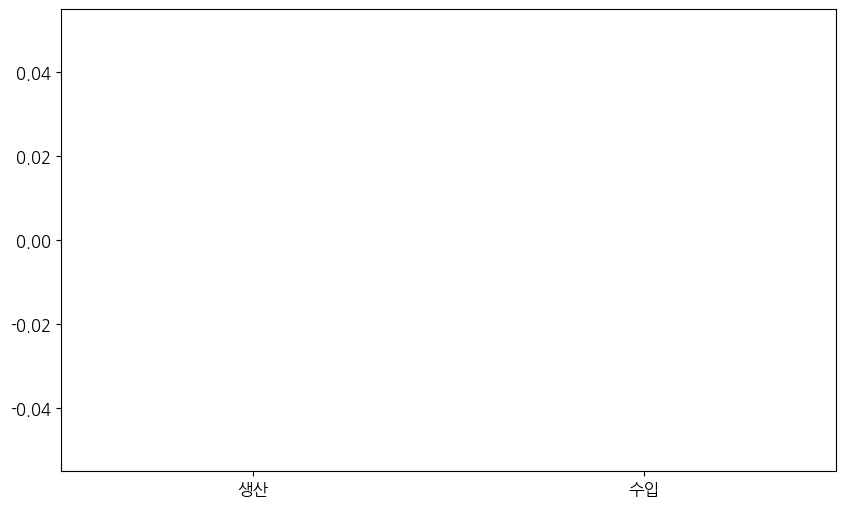

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 연도별 생산량과 수입량 집계 데이터
annual_data = {
    '생산수입구분': ['생산', '수입'],
    '2018': [4.302781e+07, 0.000000e+00],
    '2019': [4.030329e+07, 0.000000e+00],
    '2020': [4.312337e+05, 1.964701e+07],
    '2021': [2.000000e+07, 5.000000e+06],
    '2022': [1.800000e+07, 4.500000e+06],
    '2023': [2.200000e+07, 4.800000e+06],
}

# DataFrame 변환
import pandas as pd
annual_data = pd.DataFrame(annual_data).set_index('생산수입구분').T

# 2018년부터 2023년까지 필터링
annual_data = annual_data.loc['2018':'2023']
print(annual_data.head())  # 데이터 확인

# 애니메이션 초기 설정
fig, ax = plt.subplots(figsize=(10, 6))
years = annual_data.index
x = ['생산', '수입']
bars = ax.bar(x, [0, 0], color=['skyblue', 'orange'])

# 애니메이션 업데이트 함수
def update(year):
    ax.clear()
    ax.set_title(f"{year}년 생산량과 수입량 비교", fontsize=14)
    ax.set_xlabel('구분', fontsize=10)
    ax.set_ylabel('생산수입량', fontsize=10)
    values = annual_data.loc[year]
    ax.bar(x, values, color=['skyblue', 'orange'])

# 애니메이션 생성
ani = FuncAnimation(fig, update, frames=years, repeat=True, interval=1000)
plt.show()

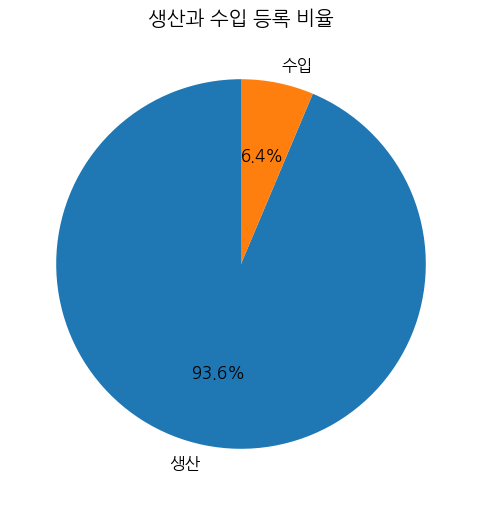

In [ ]:
# 생산수입구분별 비율 계산
category_counts = data['생산수입구분'].value_counts()

# 파이 차트 생성
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('생산과 수입 등록 비율')
plt.show()

<Figure size 1000x600 with 0 Axes>

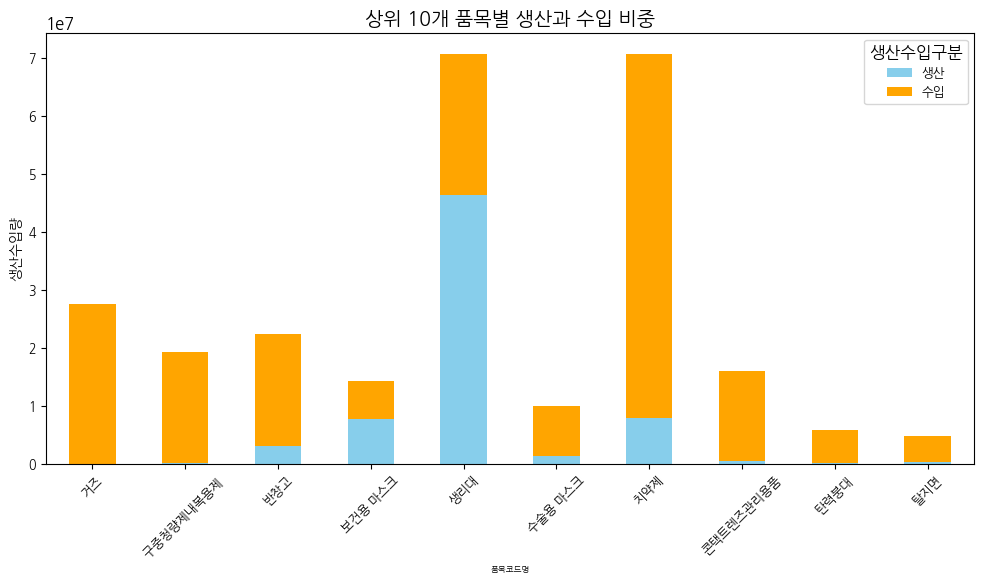

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 품목코드가 없는 데이터 제외
filtered_data = data.dropna(subset=['품목코드명'])

# 품목코드별 생산과 수입 집계 (상위 10개)
top10_codes = filtered_data.groupby('품목코드명')['생산수입량'].sum().nlargest(10).index
top10_data = filtered_data[filtered_data['품목코드명'].isin(top10_codes)].groupby(['품목코드명', '생산수입구분'])['생산수입량'].sum().unstack(fill_value=0)

# X축 레이블을 10글자로 제한
top10_data.index = [str(x)[:10] for x in top10_data.index]

# 누적 막대그래프 생성
plt.figure(figsize=(10, 6))
top10_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('상위 10개 품목별 생산과 수입 비중', fontsize=14)
plt.xlabel('품목코드명', fontsize=6)
plt.ylabel('생산수입량', fontsize=10)
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.legend(title='생산수입구분', labels=['생산', '수입'], fontsize=9)
plt.tight_layout()  # 레이아웃 조정
plt.show()

In [ ]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='생산수입구분', y='생산수입량')
plt.title('생산수입구분별 생산수입량 분포')
plt.xlabel('생산수입구분')
plt.ylabel('생산수입량')
plt.show()

NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

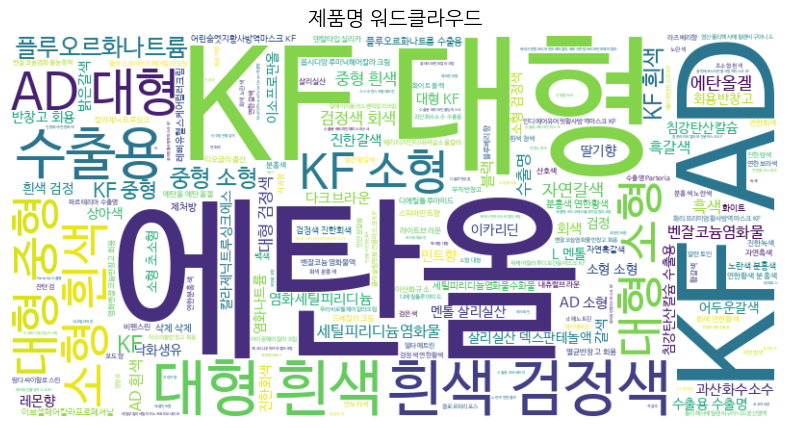

In [ ]:
from wordcloud import WordCloud

# 텍스트 데이터 처리
text_data = " ".join(data['제품명'])

# 워드 클라우드 생성
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
                      background_color='white', width=800, height=400).generate(text_data)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('제품명 워드클라우드')
plt.show()

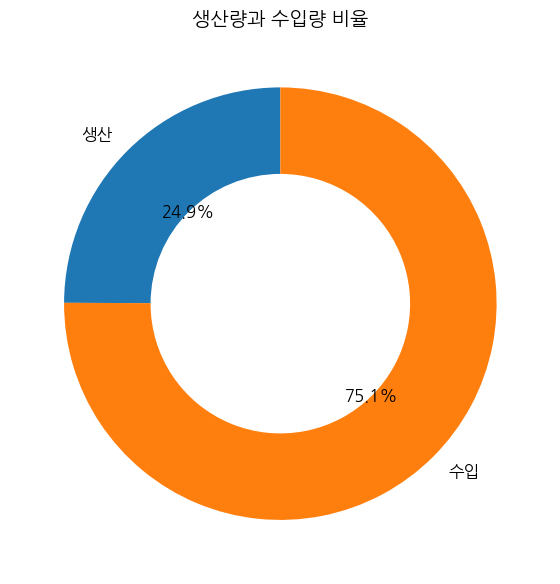

In [ ]:
# 생산량과 수입량 비율 계산
category_totals = filtered_data.groupby('생산수입구분')['생산수입량'].sum()

# 도넛 차트
plt.figure(figsize=(6, 6))
plt.pie(category_totals, labels=category_totals.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title('생산량과 수입량 비율', fontsize=14)
plt.tight_layout()
plt.show()

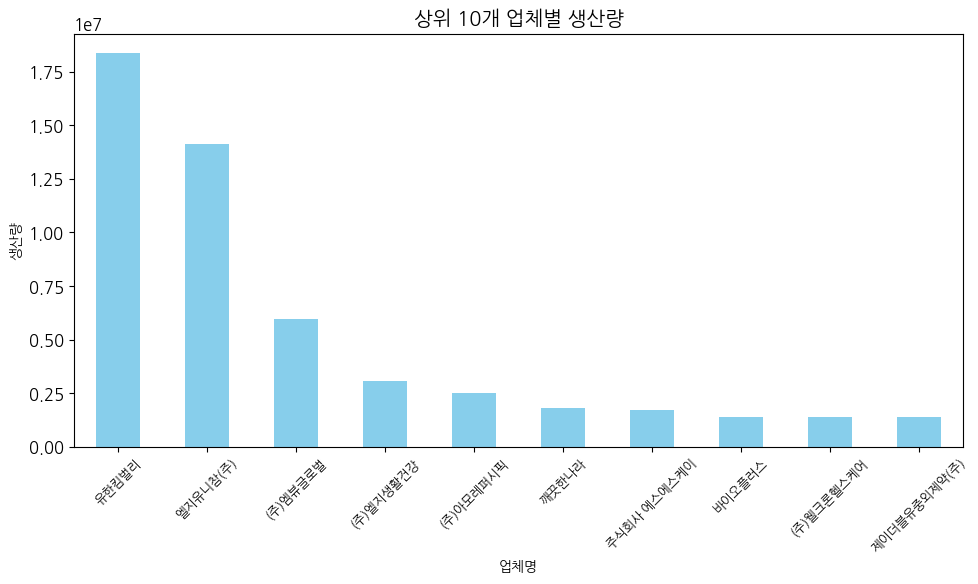

In [ ]:
# 업체별 생산량 상위 10개 집계
top10_companies = filtered_data[filtered_data['생산수입구분'] == '생산'].groupby('업체명')['생산수입량'].sum().nlargest(10)

# 막대 그래프
plt.figure(figsize=(10, 6))
top10_companies.plot(kind='bar', color='skyblue')
plt.title('상위 10개 업체별 생산량')
plt.xlabel('업체명', fontsize=10)
plt.ylabel('생산량', fontsize=10)
plt.xticks(rotation=45, fontsize=9)
plt.tight_layout()
plt.show()

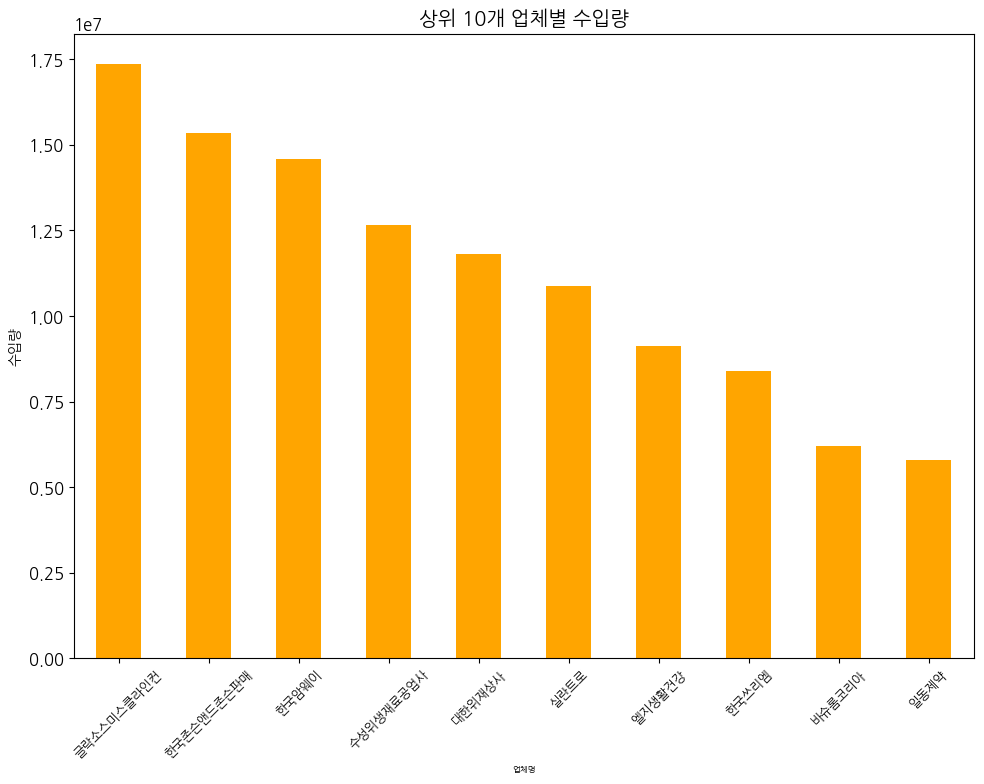

In [ ]:
# 업체별 생산량 상위 10개 집계
top10_companies = filtered_data[filtered_data['생산수입구분'] == '수입'].groupby('업체명')['생산수입량'].sum().nlargest(10)
# X축 레이블을 10글자로 제한
top10_companies.index = [str(x)[:10] for x in top10_companies.index]
# 막대 그래프
plt.figure(figsize=(10, 8))
top10_companies.plot(kind='bar', color='orange')
plt.title('상위 10개 업체별 수입량')
plt.xlabel('업체명', fontsize=6)
plt.ylabel('수입량', fontsize=10)
plt.xticks(rotation=45, fontsize=9)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

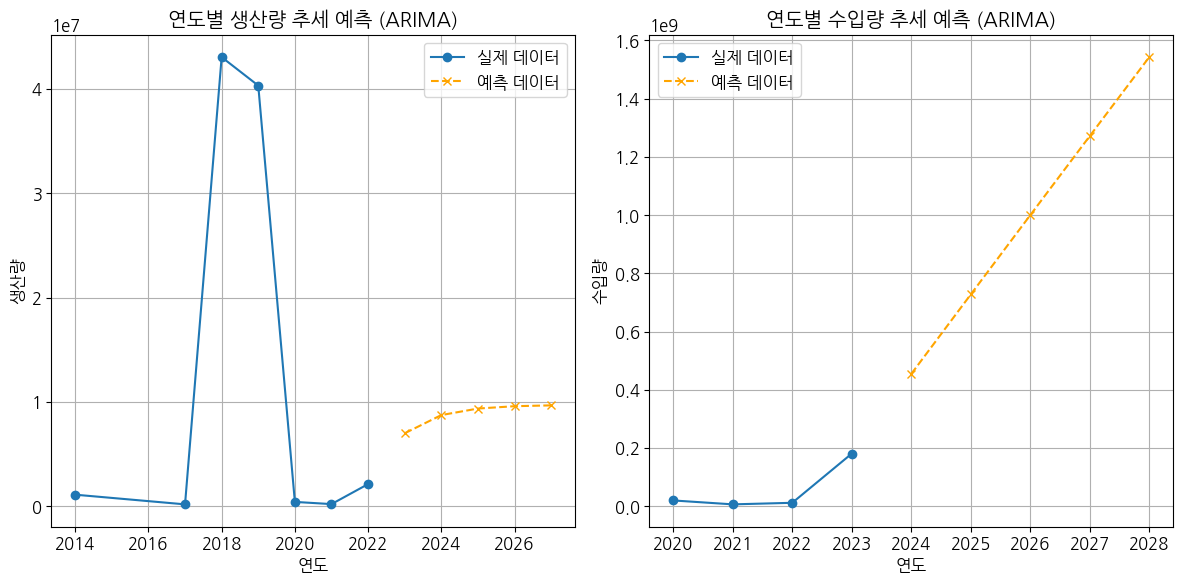

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv("/content/drive/MyDrive/supplements-final.csv")

# 데이터 전처리
data['SM_YEAR'] = data['생산수입연도'].astype(int)
data['AMT'] = data['생산수입량'].astype(float)

# 생산량 데이터 추출
생산량 = data[data['생산수입구분'] == '생산'].groupby('SM_YEAR')['AMT'].sum()

# 수입량 데이터 추출
수입량 = data[data['생산수입구분'] == '수입'].groupby('SM_YEAR')['AMT'].sum()

# ARIMA 모델 학습 및 예측 함수
def forecast_arima(data_series, steps=5):
    model = ARIMA(data_series, order=(1, 1, 1))  # p=1, d=1, q=1 설정
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    forecast_years = range(data_series.index[-1] + 1, data_series.index[-1] + 1 + steps)
    return forecast_years, forecast

# 생산량 예측
생산_예측_연도, 생산_예측 = forecast_arima(생산량)

# 수입량 예측
수입_예측_연도, 수입_예측 = forecast_arima(수입량)

# 결과 시각화
plt.figure(figsize=(12, 6))

# 생산량 그래프
plt.subplot(1, 2, 1)
plt.plot(생산량.index, 생산량.values, label='실제 데이터', marker='o')
plt.plot(생산_예측_연도, 생산_예측, label='예측 데이터', linestyle='--', marker='x', color='orange')
plt.title("연도별 생산량 추세 예측 (ARIMA)")
plt.xlabel("연도")
plt.ylabel("생산량")
plt.legend()
plt.grid()

# 수입량 그래프
plt.subplot(1, 2, 2)
plt.plot(수입량.index, 수입량.values, label='실제 데이터', marker='o')
plt.plot(수입_예측_연도, 수입_예측, label='예측 데이터', linestyle='--', marker='x', color='orange')
plt.title("연도별 수입량 추세 예측 (ARIMA)")
plt.xlabel("연도")
plt.ylabel("수입량")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.1422
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3834 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0787     
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0795 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1257 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1883 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0788 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1197 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0791 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0818 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1082 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2583 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1506 
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1496 
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0944 
Epoch 16/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5m

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.9991
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.9698
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.9405
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.9105
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.8795
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.8472
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.8136
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.7786
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.7420
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.7037
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.6637
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.6220
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.5786
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.5335
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.4868
Epoch 16/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/st

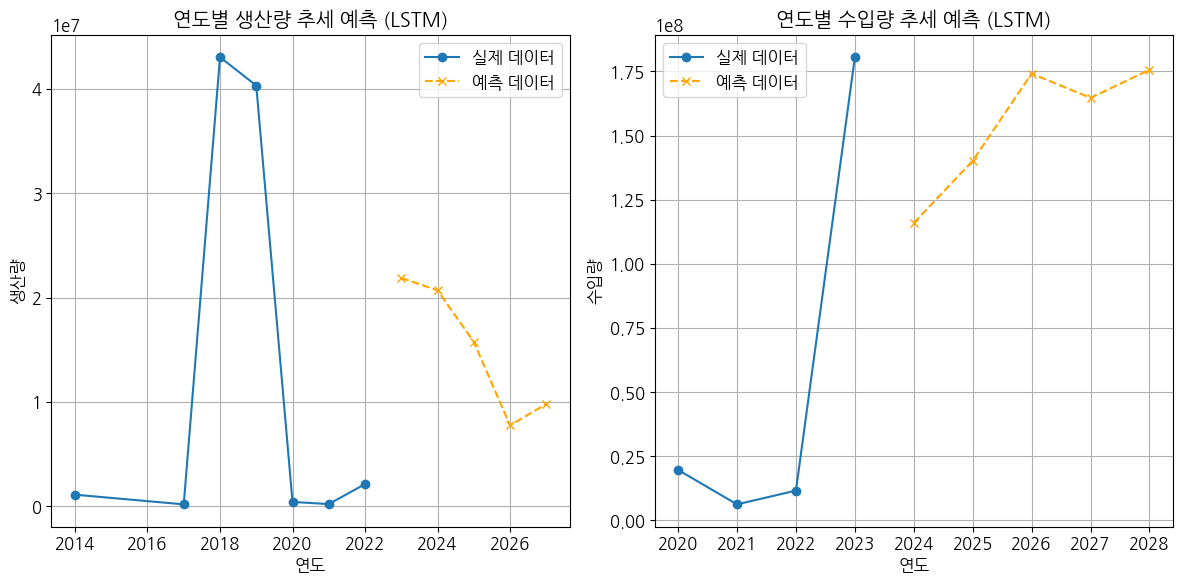

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# 데이터 정규화 및 시계열 데이터 준비
def prepare_data(data_series, look_back=3):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data_series.values.reshape(-1, 1))

    X, Y = [], []
    for i in range(len(scaled_data) - look_back):
        X.append(scaled_data[i:i + look_back, 0])
        Y.append(scaled_data[i + look_back, 0])
    X = np.array(X)
    Y = np.array(Y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # 3D 형태로 변환
    return X, Y, scaler

# LSTM 모델 정의
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# LSTM 학습 및 예측
def forecast_lstm(data_series, look_back=3, steps=5):
    X, Y, scaler = prepare_data(data_series, look_back)
    model = build_lstm_model((look_back, 1))
    model.fit(X, Y, batch_size=1, epochs=20)

    # 미래 예측
    last_sequence = scaler.transform(data_series.values[-look_back:].reshape(-1, 1))
    future_X = last_sequence.reshape(1, look_back, 1)
    predicted = []
    for _ in range(steps):
        next_pred = model.predict(future_X)[0]
        predicted.append(next_pred)
        future_X = np.append(future_X[:, 1:, :], [[next_pred]], axis=1)

    predicted = scaler.inverse_transform(np.array(predicted).reshape(-1, 1))
    forecast_years = range(data_series.index[-1] + 1, data_series.index[-1] + 1 + steps)
    return forecast_years, predicted

# 생산량 예측
생산_예측_연도, 생산_예측 = forecast_lstm(생산량)

# 수입량 예측
수입_예측_연도, 수입_예측 = forecast_lstm(수입량)

# 결과 시각화
plt.figure(figsize=(12, 6))

# 생산량 그래프
plt.subplot(1, 2, 1)
plt.plot(생산량.index, 생산량.values, label='실제 데이터', marker='o')
plt.plot(생산_예측_연도, 생산_예측, label='예측 데이터', linestyle='--', marker='x', color='orange')
plt.title("연도별 생산량 추세 예측 (LSTM)")
plt.xlabel("연도")
plt.ylabel("생산량")
plt.legend()
plt.grid()

# 수입량 그래프
plt.subplot(1, 2, 2)
plt.plot(수입량.index, 수입량.values, label='실제 데이터', marker='o')
plt.plot(수입_예측_연도, 수입_예측, label='예측 데이터', linestyle='--', marker='x', color='orange')
plt.title("연도별 수입량 추세 예측 (LSTM)")
plt.xlabel("연도")
plt.ylabel("수입량")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()